# Exploratory Data Analysis of IMU-Parkinson data

This notebook aims to identify characteristics of the collected data for Parkinson Disease (PD) 
screening. The data is stored as pickle or csv files in a tabular way. For each patient (in
a specific date), we have a time-series record associated, every entry in the dataset is 
a timestamp with all the measured components by the Inertial Measurement Units (IMUs).

## Required Imports

Here is the list of the required imports to execute this notebook correctly

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from src.settings import ROOT_DIR
from src.data.eda_helper import get_id, load_id_map, load_patients_ids

from src.data.visualization_helper import plot_lifts_component_signal

##Include definition of colors for plots

## Data loading

First of all, we load the pickle file into a variable. It contains the data in a Pandas Dataframe object.

In [2]:
raw_data_path = ROOT_DIR / 'data' / 'raw'
imu_data: pd.DataFrame = pd.read_pickle(raw_data_path / 'anon_imu_data_time_series.pkl')
imu_data['anon_id'] = imu_data['anon_id'].astype(str)
type(imu_data)

pandas.core.frame.DataFrame

We have to check the amount of entries in the dataframe and how many patients and 
controls (not PD diagnosed persons) we have. Due to no patient were measured at the 
same time, we could use the `date_measure` to identify the amount of measured persons.

In [3]:
num_time_stamps = len(imu_data)
num_measures = len(imu_data['date_measure'].unique())
print(f"""Number of time-stamps: {num_time_stamps}
Number of measures: {num_measures}
""")

Number of time-stamps: 597528
Number of measures: 218


In [4]:
imu_data.head()

,anon_id,date_measure,time_stamp,imu_gyroX_right,imu_gyroY_right,imu_gyroZ_right,imu_accX_right,imu_accY_right,imu_accZ_right,imu_gyroX_left,...,imu_angleZ_spine,imu_angularX_left,imu_angularY_left,imu_angularZ_left,imu_angularX_right,imu_angularY_right,imu_angularZ_right,imu_angularX_spine,imu_angularY_spine,imu_angularZ_spine
0,1,,0.0,-1214.134378,-706.898961,-342.133395,8.902096,3.048967,-2.707115,-1379.007652,...,-80.931437,-10.786784,-0.300330,-0.366041,-10.036721,0.142365,-0.399272,-1.697610,-0.283670,-0.027008
1,1,,41.0,-528.943208,-481.033408,-829.426549,8.826445,3.244322,-2.375892,-444.959365,...,-146.977613,-7.828853,-0.231623,-0.163033,-6.197811,0.012145,-0.175718,5.924031,-0.119951,0.407286
2,1,,82.0,42.937833,-328.464835,-937.806656,8.769737,3.341177,-2.128276,443.239462,...,849.016319,-1.793131,-0.104697,0.184659,-0.136697,-0.158921,0.153815,3.962417,-0.201369,0.108350
3,1,,123.0,386.718612,-305.928210,-531.510961,8.782168,3.298552,-2.002942,1101.526862,...,1113.979920,6.683067,0.056346,0.567452,5.757335,-0.251148,0.422339,6.045454,0.162363,-0.061530
4,1,,164.0,399.637302,-438.997050,195.116809,8.929922,3.152229,-1.978899,1220.818122,...,963.511330,15.394780,0.213584,0.848198,9.446619,-0.194006,0.507620,-3.624151,0.095794,-0.360073


Here are all the initial dataframe's columns and it's types:

In [5]:
imu_data['anon_id'] = imu_data['anon_id'].astype("string")
imu_data['date_measure'] = imu_data['date_measure'].astype("string")
imu_data.dtypes

anon_id               string[python]
date_measure          string[python]
time_stamp                   float64
imu_gyroX_right              float64
imu_gyroY_right              float64
imu_gyroZ_right              float64
imu_accX_right               float64
imu_accY_right               float64
imu_accZ_right               float64
imu_gyroX_left               float64
imu_gyroY_left               float64
imu_gyroZ_left               float64
imu_accX_left                float64
imu_accY_left                float64
imu_accZ_left                float64
imu_gyroX_spine              float64
imu_gyroY_spine              float64
imu_gyroZ_spine              float64
imu_accX_spine               float64
imu_accY_spine               float64
imu_accZ_spine               float64
imu_angleX_right             float64
imu_angleY_right             float64
imu_angleZ_right             float64
imu_angleX_left              float64
imu_angleY_left              float64
imu_angleZ_left              float64
i

## Data Insights & Cleaning
The head of the dataframe just showed us that are some empty entries in dataframe, also by
previous usage of the data we know that some anonymous ids refer to not real ids, so on, those
fake are going to be deleted with the empty entries.

In [6]:
imu_data.isnull().sum()

anon_id               0
date_measure          0
time_stamp            0
imu_gyroX_right       0
imu_gyroY_right       0
imu_gyroZ_right       0
imu_accX_right        0
imu_accY_right        0
imu_accZ_right        0
imu_gyroX_left        0
imu_gyroY_left        0
imu_gyroZ_left        0
imu_accX_left         0
imu_accY_left         0
imu_accZ_left         0
imu_gyroX_spine       0
imu_gyroY_spine       0
imu_gyroZ_spine       0
imu_accX_spine        0
imu_accY_spine        0
imu_accZ_spine        0
imu_angleX_right      0
imu_angleY_right      0
imu_angleZ_right      0
imu_angleX_left       0
imu_angleY_left       0
imu_angleZ_left       0
imu_angleX_spine      0
imu_angleY_spine      0
imu_angleZ_spine      0
imu_angularX_left     0
imu_angularY_left     0
imu_angularZ_left     0
imu_angularX_right    0
imu_angularY_right    0
imu_angularZ_right    0
imu_angularX_spine    0
imu_angularY_spine    0
imu_angularZ_spine    0
dtype: int64

There are any null or None values, even that the dataframe's `head()` just showed an empty
value in the `date_measure` column, thus we are going to remove all records with
empty strings in the date of measure.

In [7]:
empty_strings = list(filter(lambda x: x == '', imu_data['date_measure'].unique().tolist()))
print(f'Amount of empty strings in date_measure: {len(empty_strings)}')

Amount of empty strings in date_measure: 1


Now the empty entries will be deleted with the fake ids:

In [8]:
imu_data = imu_data[imu_data['date_measure'] != '']

In [9]:
imu_data['temp_id'] = imu_data['anon_id'].apply(get_id)

In [10]:
imu_data = imu_data[(imu_data['temp_id'].str.len() >= 7) & (imu_data['temp_id'].str.len() <= 10)]
#imu_data.drop('temp_id', axis=1, inplace=True)

In [11]:
num_time_stamps = len(imu_data)
num_measured_persons = len(imu_data['date_measure'].unique())
print(f"""Number of time-stamps: {num_time_stamps}
Number of measured persons: {num_measured_persons}
""")

Number of time-stamps: 571226
Number of measured persons: 202


In [12]:
imu_data.head()

,anon_id,date_measure,time_stamp,imu_gyroX_right,imu_gyroY_right,imu_gyroZ_right,imu_accX_right,imu_accY_right,imu_accZ_right,imu_gyroX_left,...,imu_angularX_left,imu_angularY_left,imu_angularZ_left,imu_angularX_right,imu_angularY_right,imu_angularZ_right,imu_angularX_spine,imu_angularY_spine,imu_angularZ_spine,temp_id
0,7,2023-6-17-10-11-0,0.0,4317.298276,-4899.761299,-14.170563,-1.768147,9.725527,-3.283313,-5879.346588,...,-461.400298,0.031185,-0.176183,-323.022930,-0.059187,-0.638172,-23.549230,0.030871,-0.000427,1496380
1,7,2023-6-17-10-11-0,41.0,1247.642218,-179.177664,-1272.505067,0.092821,6.050605,-4.641567,-1071.177903,...,-335.987786,0.028372,-0.141401,-210.935647,-0.046156,-0.396737,-22.269073,0.018425,-0.027971,1496380
2,7,2023-6-17-10-11-0,82.0,-457.831696,2825.677180,-1914.768705,1.346265,4.616875,-5.448492,2200.497019,...,-150.488381,0.022460,-0.086041,-47.446856,-0.025818,-0.052526,19.316766,0.009623,-0.029694,1496380
3,7,2023-6-17-10-11-0,123.0,-292.320683,3371.239587,-1705.037324,1.719265,6.107366,-5.562670,3268.084307,...,6.443987,0.013306,-0.030687,85.332913,-0.006197,0.205669,-62.167597,-0.035631,-0.113693,1496380
4,7,2023-6-17-10-11-0,164.0,1073.241432,2039.342262,-921.521124,1.388297,9.169687,-5.313935,2620.255020,...,75.973941,0.001616,0.007846,132.151813,0.006294,0.258742,-100.936071,-0.027461,-0.081213,1496380


## Proportion of Controls and patients
Now we have to identify which part of those 218 persons are patients, and how many 
of them are controls. To perform that task we have to add an extra column to the 
data: `PD`. This is a binary column where 1 means the person is a patient, and 0 
is a control. We can use the excel file with all the patients id's:

In [13]:
#Read file with patients (1)
patients_ids = load_patients_ids()
patients_ids_list = patients_ids['CC'].tolist()

#Read file with all the anonymized ids
id_map = load_id_map()

def is_patient(anonymized_id: str) -> int:
    """
    anonymized_id: str with the patient's anonymized id
    returns result 1 if is patient, otherwise 0
    """
    
    real_id_list: list = id_map.loc[id_map['anon_id'] == anonymized_id, 'patient_id'].tolist()
    real_id: str = real_id_list[0] if len(real_id_list) > 0 else None
    result = 1 if real_id in patients_ids_list else 0
    
    return result

In [14]:
imu_data['PD'] = imu_data['anon_id'].apply(is_patient)

In [15]:
amount_patients = imu_data.groupby('PD')['anon_id'].nunique()
amount_patients

PD
0     81
1    104
Name: anon_id, dtype: int64

In [16]:
imu_data.groupby('PD')['anon_id'].unique()

PD
0    [10, 13, 15, 16, 19, 23, 39, 44, 46, 50, 57, 5...
1    [7, 8, 9, 11, 12, 14, 17, 18, 20, 21, 22, 24, ...
Name: anon_id, dtype: object

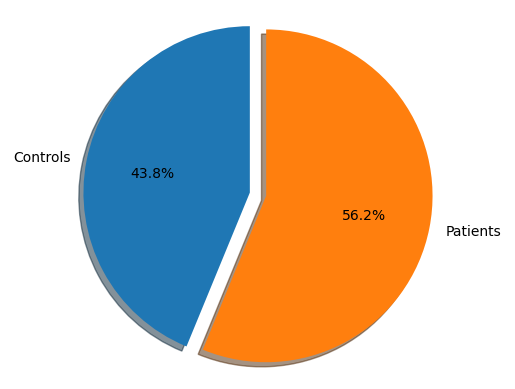

In [17]:
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(amount_patients)))

labels = 'Controls', 'Patients'
sizes = amount_patients
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

Currently, this plot appears to be balanced, or close to it. Despite it, we will replot it at the end of the data 
analysis and cleaning process. 

# Clinic Analysis
A key part of this study is the clinic analysis of all the patients. It will provide us information about the 
state of the patients at the measurement moment and the age distribution. To complete this analysis we will use
a new file where for each patient and control we have the age, the H&Y (Hoehn & Yahr) state, and the MDS-UPDRS 
(Movement Disorder Society Unified Parkinson Disease Rating Scale) score.

In [18]:
patients_data = pd.read_excel(raw_data_path / 'imus y marcha (1).xlsx')
patients_data['CC'] = patients_data['CC'].astype('string')
patients_data['CC'] = patients_data['CC'].str.replace('.0', '')
patients_data['Date'] = patients_data['Date'].astype('string')
patients_data.head()

,Record ID,CC,Date,Marcha,Age,Total Score MDS UPDRS,H&J,Laterality,PD
0,GEO_REF0043,1113672747,2023-09-15,0,28.0,9,1,1.0,1
1,GEO_REF0096,1006306961,2023-10-31,1,36.0,13,2,1.0,1
2,GEO_REF0097,1114842232,2023-10-31,1,39.0,8,2,2.0,1
3,GEO_REF0103,16944796,2023-12-04,2,41.0,43,1.5,2.0,1
4,GEO_REF0023,1090736,2023-09-05,1,42.0,30,1,1.0,1


In [19]:
unique_imu_data = imu_data[imu_data['PD'] == 1]['anon_id'].unique()
unique_imu_data = set([get_id(anon_id) for anon_id in unique_imu_data])
unique_patients_data = set(patients_data[patients_data['PD'] == 1]['CC'].unique())
common = unique_imu_data.intersection(unique_patients_data)
print(f"""
Len common: {len(common)}
Size imu_data: {len(unique_imu_data)}
Size patients: {len(unique_patients_data)}
""")

184
Len common: 101
Size imu_data: 104
Size patients: 124


In [20]:
result: pd.DataFrame = patients_data.loc[(patients_data['CC'].isin(common)) & (patients_data['PD'] == 1)]
result.head()

,Record ID,CC,Date,Marcha,Age,Total Score MDS UPDRS,H&J,Laterality,PD
0,GEO_REF0043,1113672747,2023-09-15,0,28.0,9,1,1.0,1
1,GEO_REF0096,1006306961,2023-10-31,1,36.0,13,2,1.0,1
2,GEO_REF0097,1114842232,2023-10-31,1,39.0,8,2,2.0,1
3,GEO_REF0103,16944796,2023-12-04,2,41.0,43,1.5,2.0,1
6,GEO_REF0082,94524752,2023-10-24,2,44.0,43,2,1.0,1


## Age Distribution
PD is neurodegenrative disease that trends to appear in third-age people. Lets see how may patients we have 
by groups of 10 years:

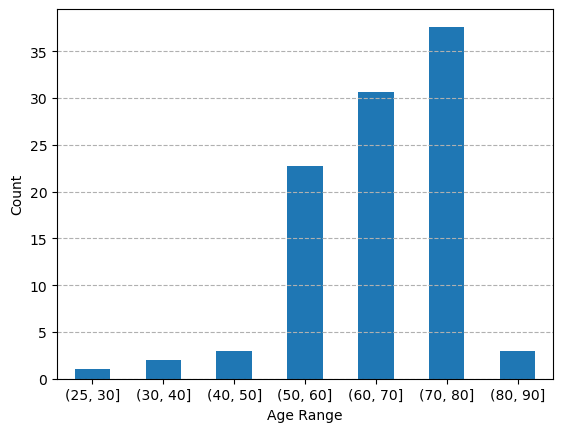

In [21]:
age_ranges = pd.cut(result['Age'], [25, 30, 40, 50, 60, 70, 80, 90])
age_ranges = age_ranges.value_counts(normalize=True, sort=False)
age_ranges = age_ranges.sort_index()
age_ranges.plot(kind='bar')

ax = (100*age_ranges).plot(kind='bar')
ax.grid(axis='y', linestyle='--')
ax.tick_params(axis='x', labelrotation = 0)

plt.xlabel('Age Range')
plt.ylabel('Count')

plt.show()

## H&Y Distribution
This study will be focused on parkinson screening for early stage patients. Early stage will be considered
as patients that were classiied as stage 1, 1.5, 2 and 2.5 in the modern Hoehn and Yahr scale.

In [22]:
result['H&J'].value_counts()

H&J
2              45
1.5            17
3              15
1              10
2.5             6
4               5
no tengo hc     1
Unknown         1
Name: count, dtype: int64

<Axes: xlabel='H&J'>

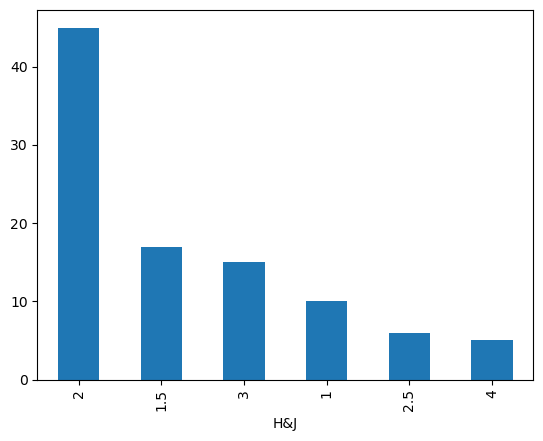

In [23]:
result = result[(result['H&J'] !=  'no tengo hc') & (result['H&J'] !=  'Unknown')]
result['H&J'].value_counts().plot(kind='bar')

As this study is focused on the parkinson screening, the patients that are in H&Y stage 3 or greater
will not be considered.

In [24]:
early_stages_ids = result.copy()
early_stages_ids['H&J'] = early_stages_ids['H&J'].astype(float)
early_stages_ids = early_stages_ids[early_stages_ids['H&J'] < 3]
print('Amount of patients H&Y stage < 3:', len(early_stages_ids))

Amount of patients H&Y stage < 3: 78


We will use only those 78 patients and the controls, then we will have to drop the rest from the original dataset `imu_data`:

In [25]:
early_stages_ids = early_stages_ids['CC'].tolist()
imu_data = imu_data[(imu_data['PD'] == 1 & imu_data['temp_id'].isin(early_stages_ids)) | (imu_data['PD'] == 0)]
print(imu_data['anon_id'].nunique())

159


In [26]:
# The rest of this exploratory analysis will not use anymore the person's real ID
imu_data.drop('temp_id', axis=1, inplace=True)

# Records Characteristics
All timestamps are part of a measure made in a specific date. The Measure was taken during a walk of 6 meters. Movement speed is 
one of the main factors affected by PD, thus is important identify the longest walk and also the shortest to validate the data consistency.

By previous knowledge and experimentation we know that, during these walks, there was no patient or control that took more than 8 minutes. 
Also, the time that someone takes to complete the walk is 10 seconds. Let's compare this information with our data.

In [27]:
records = {}
dates = imu_data['date_measure'].unique().tolist()

for date in dates:
    # Always the last value of the list is the greatest timestamp
    records[date]: float = round(imu_data[imu_data['date_measure'] == date]['time_stamp'].tolist()[-1]/1000, 2)

In [28]:
max_duration = max(records.values())
mean_duration = sum(records.values())/len(records)
min_duration = min(records.values())
median_duration = np.median(list(records.values()))
print(f"""Average duration: {mean_duration:} s
Median duration: {median_duration} s 
Min duration: {min_duration} s
Max duration: {max_duration:} s
""")

Average duration: 211.4697647058824 s
Median duration: 83.86500000000001 s 
Min duration: 0.82 s
Max duration: 11942.07 s


With the max, min and average duration of a walk we could realize that the **min duration is too short to be real** and 
the **max duration is huge**. These values put on evidence the presence of outliers in our records, probably some of 
them made by human error, rather than a real patient behavior.

Then we are going to identify outliers using graphs and remove them by the following criteria:

- Walks shorter than 10 seconds will be deleted.
- Walks that took more than 8 minutes (480 seconds) will be trimmed based on a signal analysis.

Then the max, min value and the average will be recalculated.

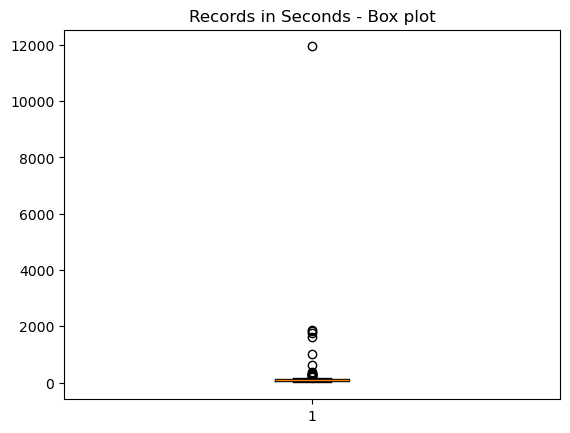

In [29]:
fig2, ax1 = plt.subplots()
plt.boxplot(records.values())
ax1.set_title('Records in Seconds - Box plot')
plt.show()

We could see that there are two main outlier, and is the previously identified max value: 11942.07 s. 
If we remove it and "*replot*" the records we get the following graph, which a bit more consistent with the
initial stated information.

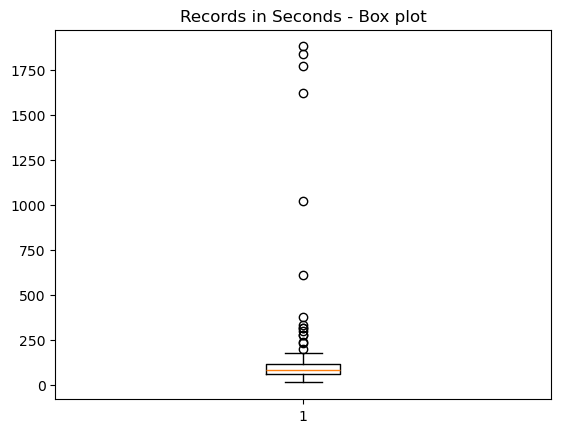

In [30]:
fig3, ax1 = plt.subplots()
plt.boxplot(sorted(records.values())[1:-1])
ax1.set_title('Records in Seconds - Box plot')
plt.show()

Even this last boxplot is more reliable it stills showing the presence of data that should be deleted or trimmed
according to our criteria.

In [86]:
# Delete short records
short_records_dates = []
for date in records:
    if records[date] < 10:
        short_records_dates.append(date)

print(f'Short records: {short_records_dates}')

for date in short_records_dates:
    imu_data = imu_data[imu_data['date_measure'] != date]

Short records: ['2023-8-31-9-18-42', '2023-8-30-10-46-18', '2023-8-30-10-49-24']


In [93]:
for date in short_records_dates:
    records.pop(date)

In [33]:
# Dates of long records
long_records_dates = []
for date in records:
    if records[date] > 480:
        long_records_dates.append(date)

print(f'Long records: {long_records_dates}')

Long records: ['2023-9-25-8-37-55', '2023-8-31-9-18-42', '2023-7-11-10-15-46', '2023-7-11-8-52-27', '2023-8-30-10-46-18', '2023-8-30-10-49-24', '2023-6-17-10-39-17']


In [34]:
print('Date\t\t\t\t\tTime (s)')
for date in long_records_dates:
    print(f'{date}\t\t{records[date]} s')

Date					Time (s)
2023-9-25-8-37-55		1770.73 s
2023-8-31-9-18-42		1879.25 s
2023-7-11-10-15-46		11942.07 s
2023-7-11-8-52-27		1022.21 s
2023-8-30-10-46-18		1835.31 s
2023-8-30-10-49-24		1621.54 s
2023-6-17-10-39-17		609.35 s


Additionally one of the most important dates to take care of is the max value identified:

In [35]:
#Getting date of the max measure
max_index = list(records.values()).index(max_duration)
date_max_duration = list(records.keys())[max_index]
#records.pop(date_max_duration, None)

print(f'Duration max: {max_duration} s')
print(f'Date: {date_max_duration}')

Duration max: 11942.07 s
Date: 2023-7-11-10-15-46


For the trimming of the largest measures we will compare their signals by using the median: 

In [36]:
median_duration = np.median(list(records.values()))
print(f'New median after short registers removal: {median_duration}')

New median after short registers removal: 84.98


In [37]:
print(len(records.values()))

169


In [38]:
median_index = list(records.values()).index(median_duration)
date_median_duration = list(records.keys())[median_index]

print(median_duration, date_median_duration)

84.98 2023-2-23-15-19-20


# Outlier comparison with Median
Due to outliers could have been generated by human error, and we are not sure if the whole
measure is wrong, we have to check at least one of the components of the outliers, compared to 
a normal measure. By this case we will use the median measure and the biggest outlier.

In [39]:
outliers_trim_values = {}

## Outlier: 11942.07 s | 2023-7-11-10-15-46

In [40]:
component = 'X'
measure = 'acc'
outlier = imu_data[imu_data['date_measure'] == date_max_duration]
median = imu_data[imu_data['date_measure'] == date_median_duration]

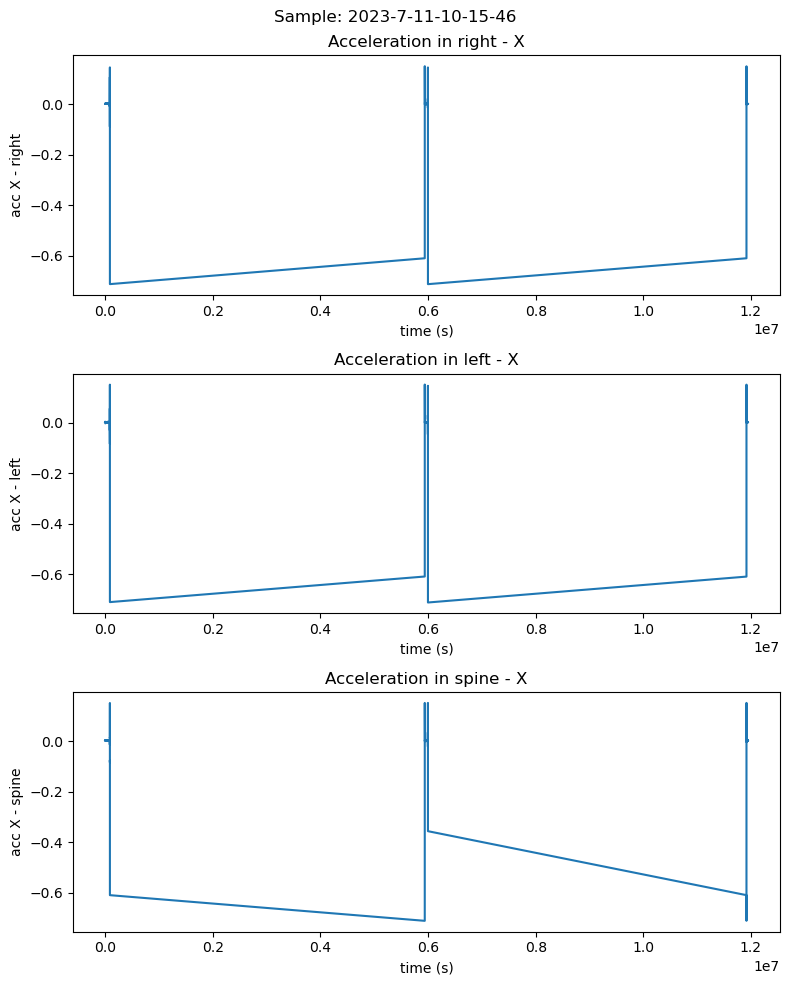

In [41]:
plot_lifts_component_signal(outlier, component, measure)

This graph only plots the acceleration of the max record in all the lifts on the component X. It clearly shows that the data
was not correctly taken. The "peak periods" could be measures and the off-peak periods could represent time when the IMU was 
not being used but was collecting data. 

Finally, this is a human measurement error. To validate if the peaks are usable data we could plot a part of the signal:

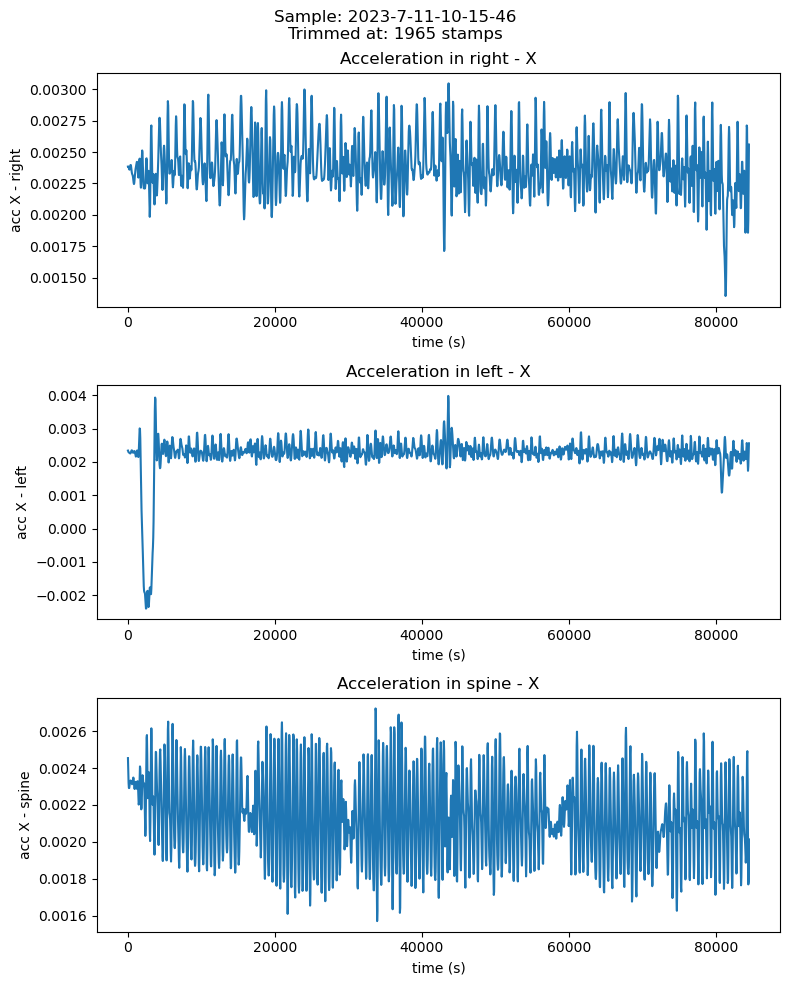

In [42]:
plot_lifts_component_signal(outlier, component, measure, trim_value= 1965)

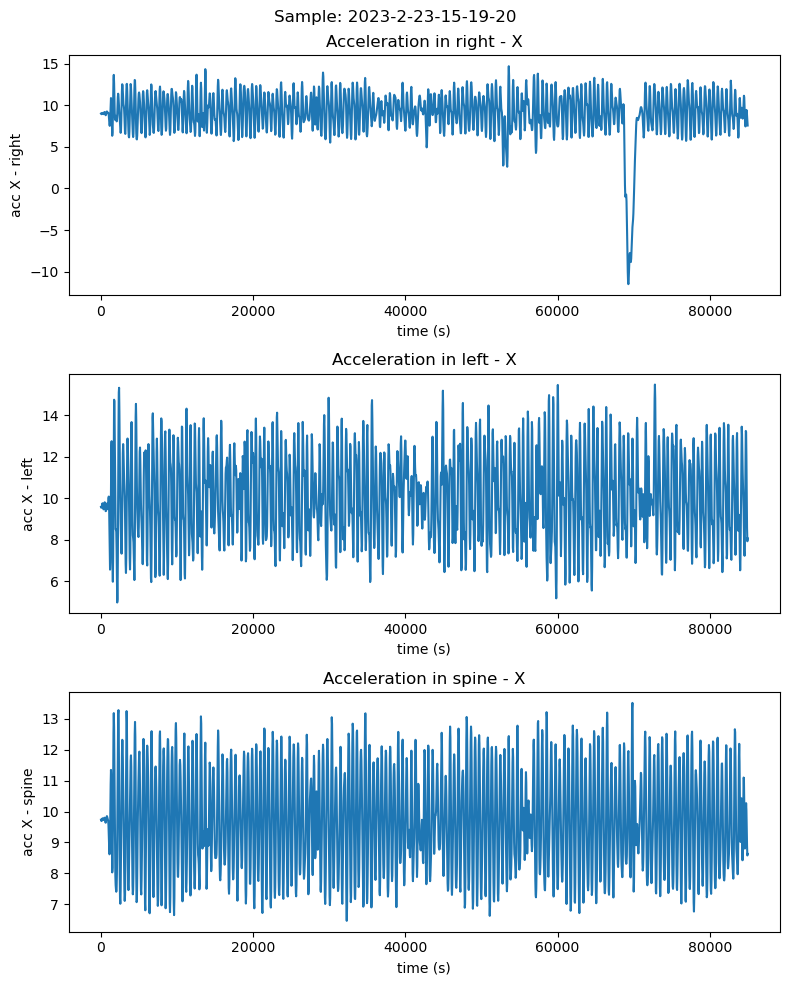

In [43]:
plot_lifts_component_signal(median, component, measure)

After comparing the signals we can conclude that: The whole outlier is not usable for this study, just parts of it 
contain the information of the gait, those parts are separated by not measured lapses, even those lapses could be removed
and the usable parts of the signal could be joined, there is no confidence that the following parts are related to the
patient associated with that date. (This measures could be part of a different patient due to the separation between measures
is too big, more than an hour).

Thus, this signal is going to be trimmed just taking the first part of it and the rest will not be considered. For 
example the previous signal is going to be trimmed at the 1965 time-stamp (around 8000 ms).

In [44]:
max_index = long_records_dates.index(date_max_duration)
long_records_dates.pop(max_index)

'2023-7-11-10-15-46'

In [45]:
outliers_trim_values[date_max_duration] = 1965

## Outlier: 1770.73 s | 2023-9-25-8-37-55

The same analysis will be made with all the too long outliers:

In [46]:
count = 0
date = long_records_dates[0]
outlier = imu_data[imu_data['date_measure'] == date]

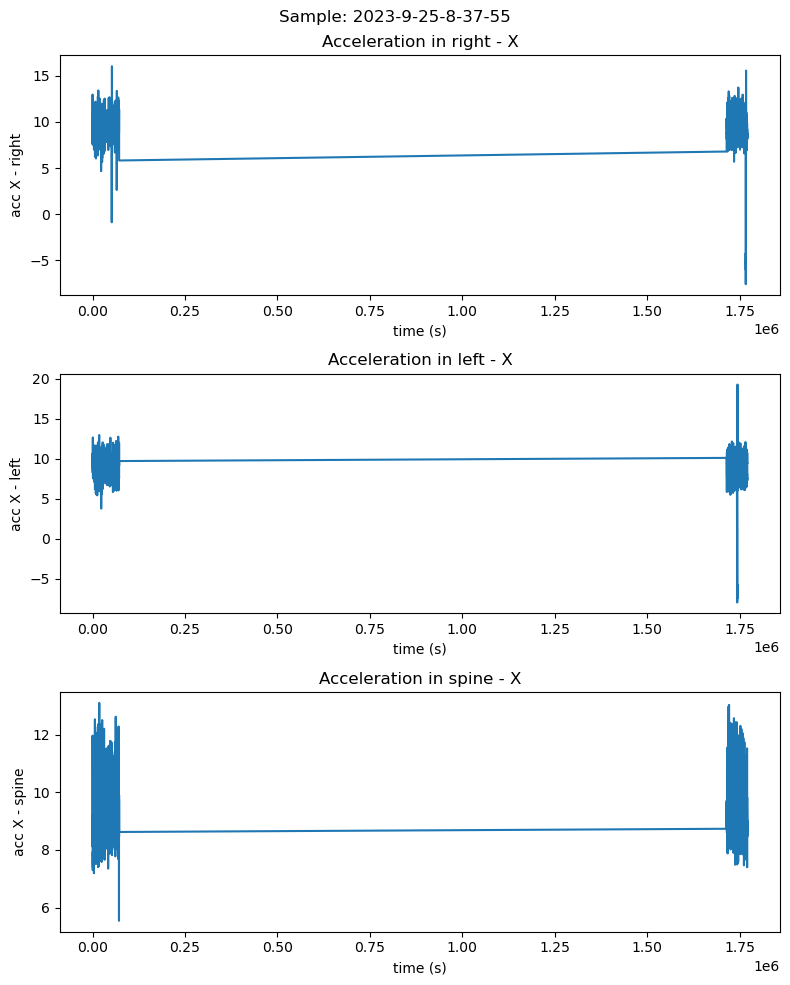

In [47]:
plot_lifts_component_signal(outlier, component, measure)

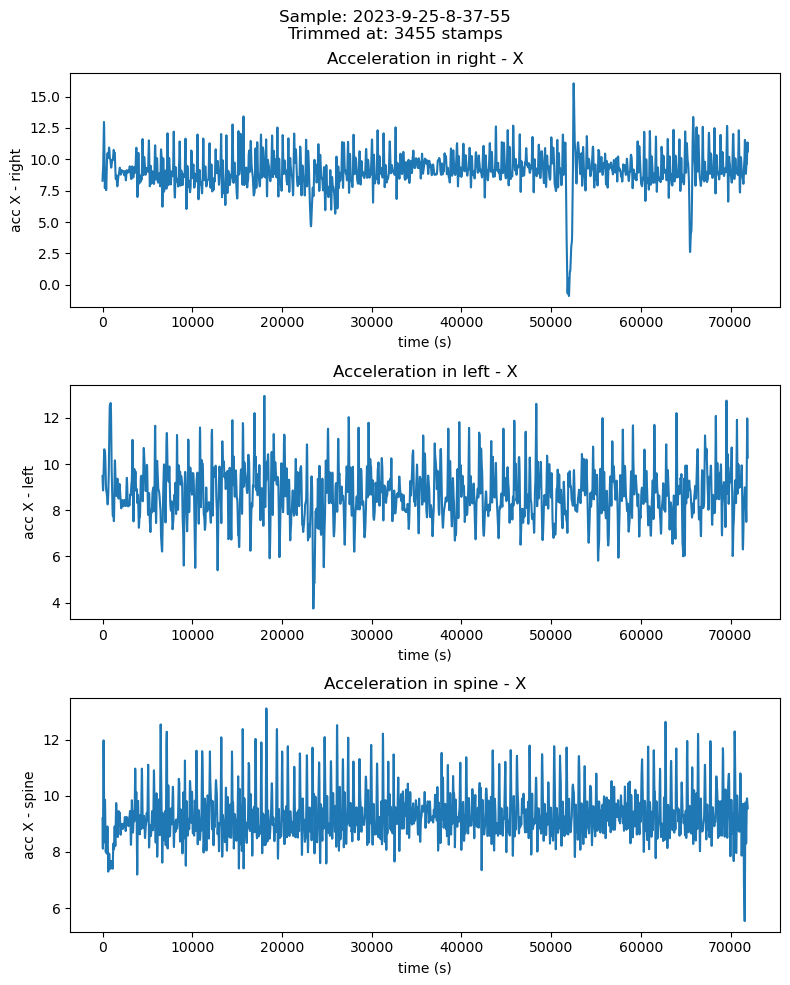

In [48]:
plot_lifts_component_signal(outlier, component, measure, trim_value= 3455)

In [49]:
outliers_trim_values[long_records_dates[count]] = 3455
count += 1

## Outlier: 1879.25 s | 2023-8-31-9-18-42

In [50]:
date = long_records_dates[count]
outlier = imu_data[imu_data['date_measure'] == date]

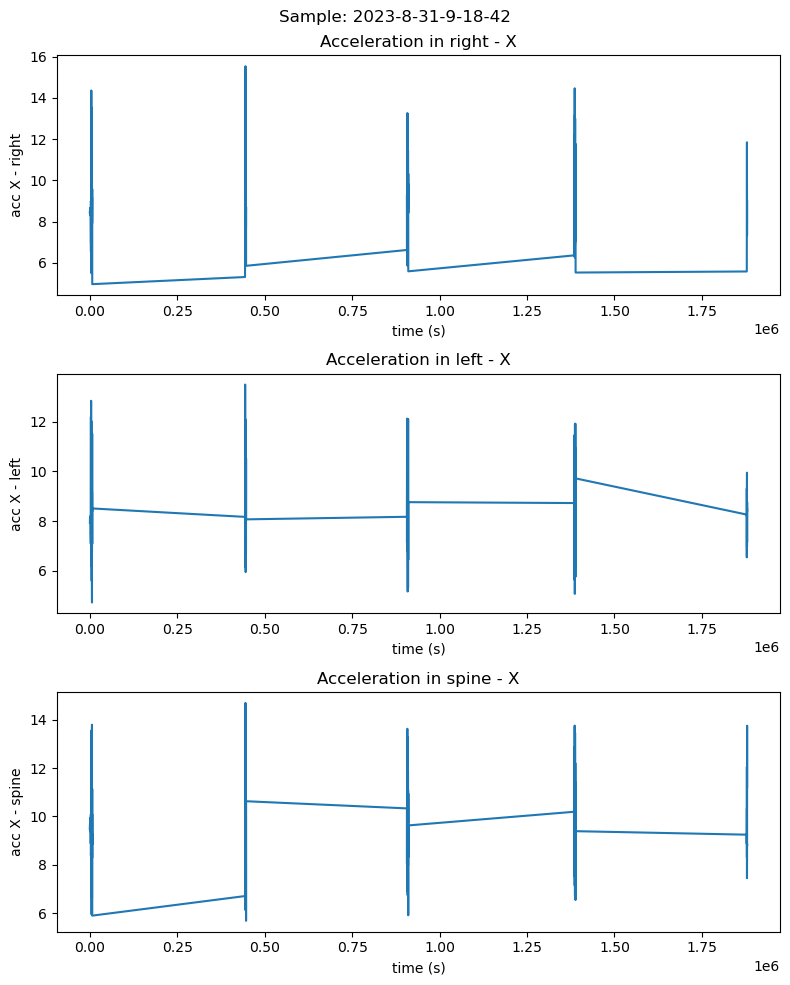

In [51]:
plot_lifts_component_signal(outlier, component, measure)

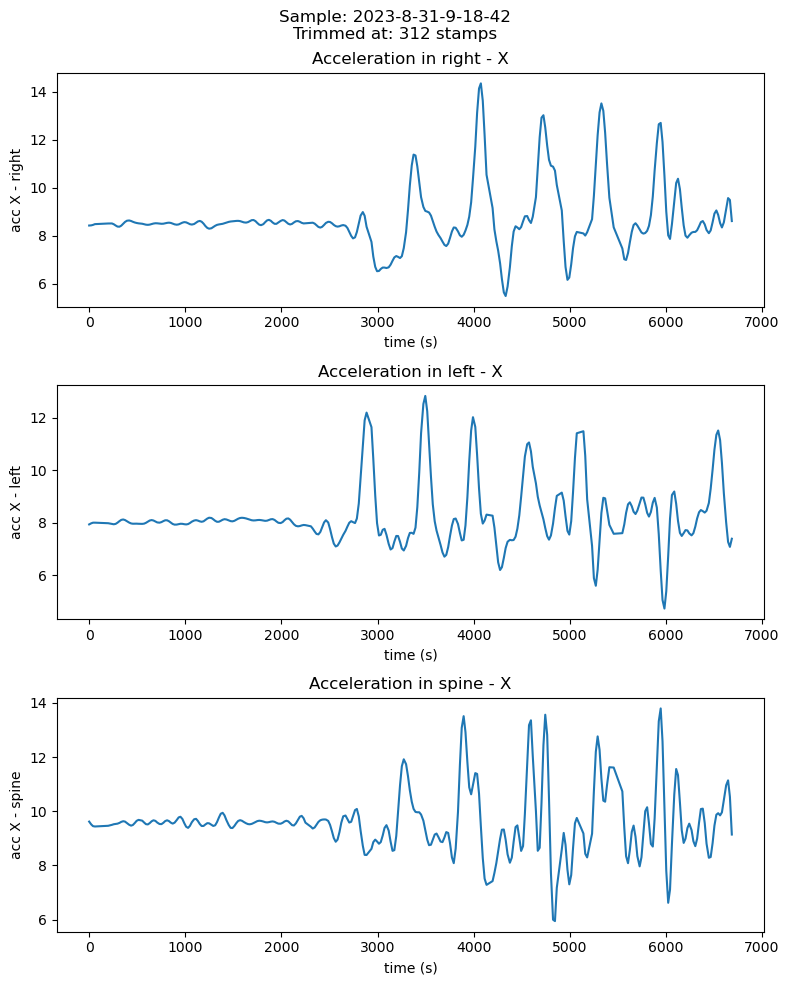

In [52]:
plot_lifts_component_signal(outlier, component, measure, trim_value= 312)

In [53]:
outliers_trim_values[long_records_dates[count]] = 312
count+=1

## Outlier: 1022.21 s | 2023-7-11-8-52-27

In [54]:
date = long_records_dates[count]
outlier = imu_data[imu_data['date_measure'] == date]

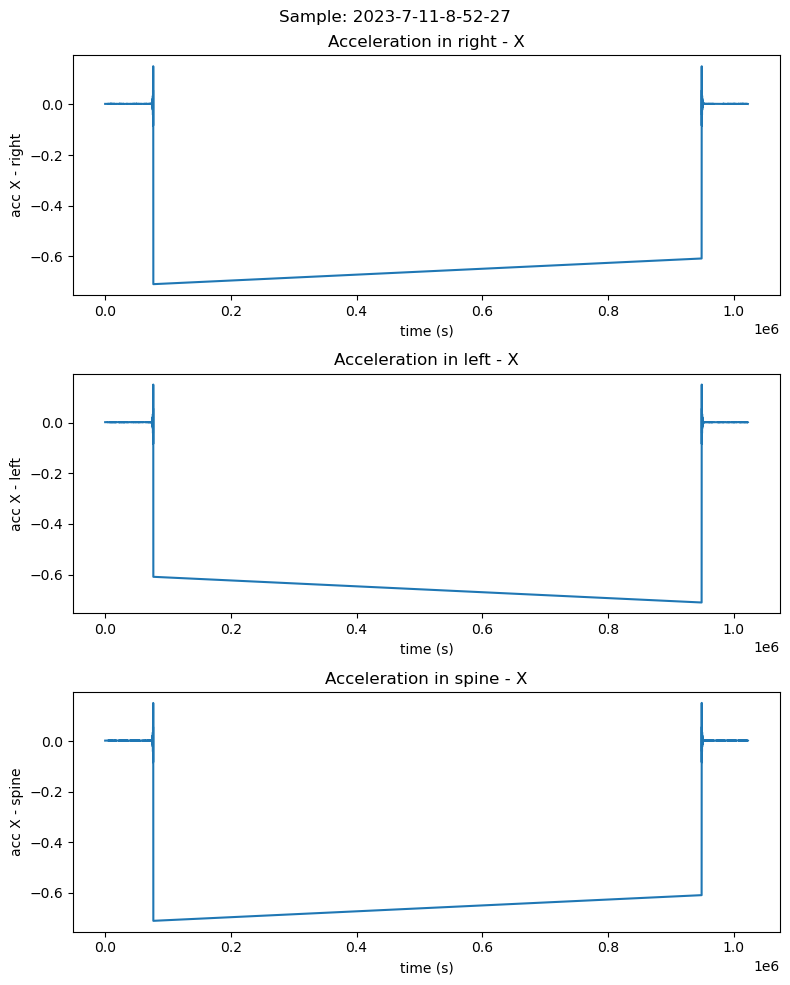

In [55]:
plot_lifts_component_signal(outlier, component, measure)

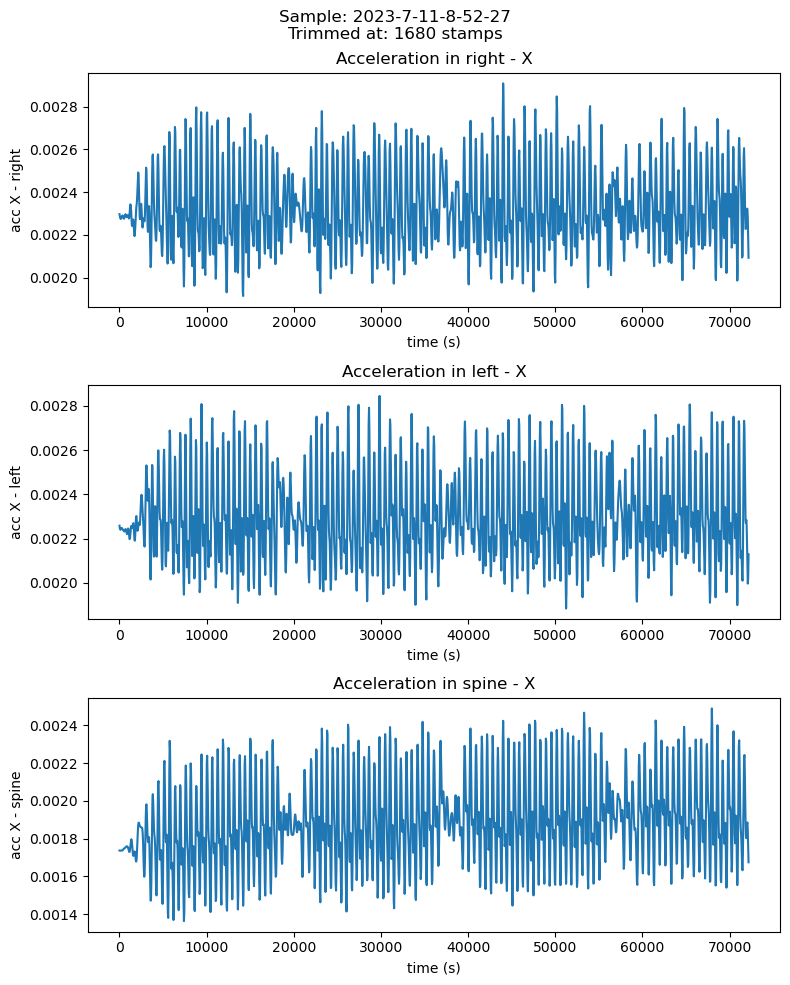

In [56]:
plot_lifts_component_signal(outlier, component, measure, trim_value= 1680)

In [57]:
outliers_trim_values[long_records_dates[count]] = 1680
count += 1

## Outlier: 1835.31 s | 2023-8-30-10-46-18

In [58]:
date = long_records_dates[count]
outlier = imu_data[imu_data['date_measure'] == date]

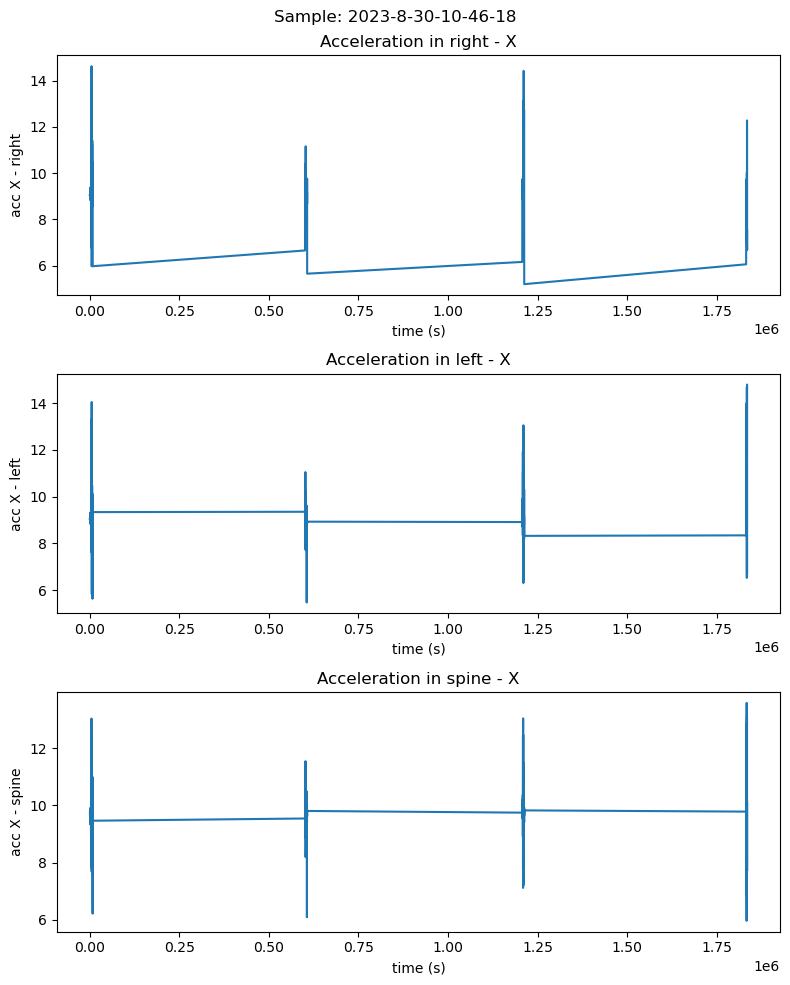

In [59]:
plot_lifts_component_signal(outlier, component, measure)

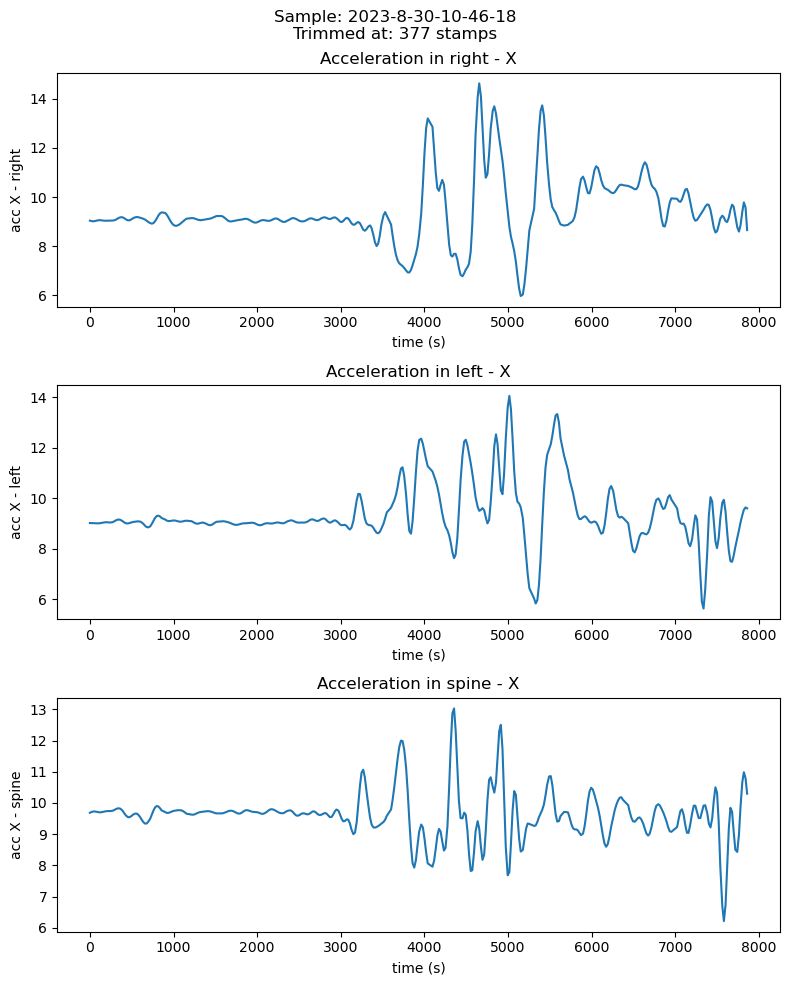

In [60]:
plot_lifts_component_signal(outlier, component, measure, trim_value= 377)

In [61]:
outliers_trim_values[long_records_dates[count]] = 377
count += 1

## Outlier: 1621.54 s | 2023-8-30-10-49-24

In [62]:
date = long_records_dates[count]
outlier = imu_data[imu_data['date_measure'] == date]

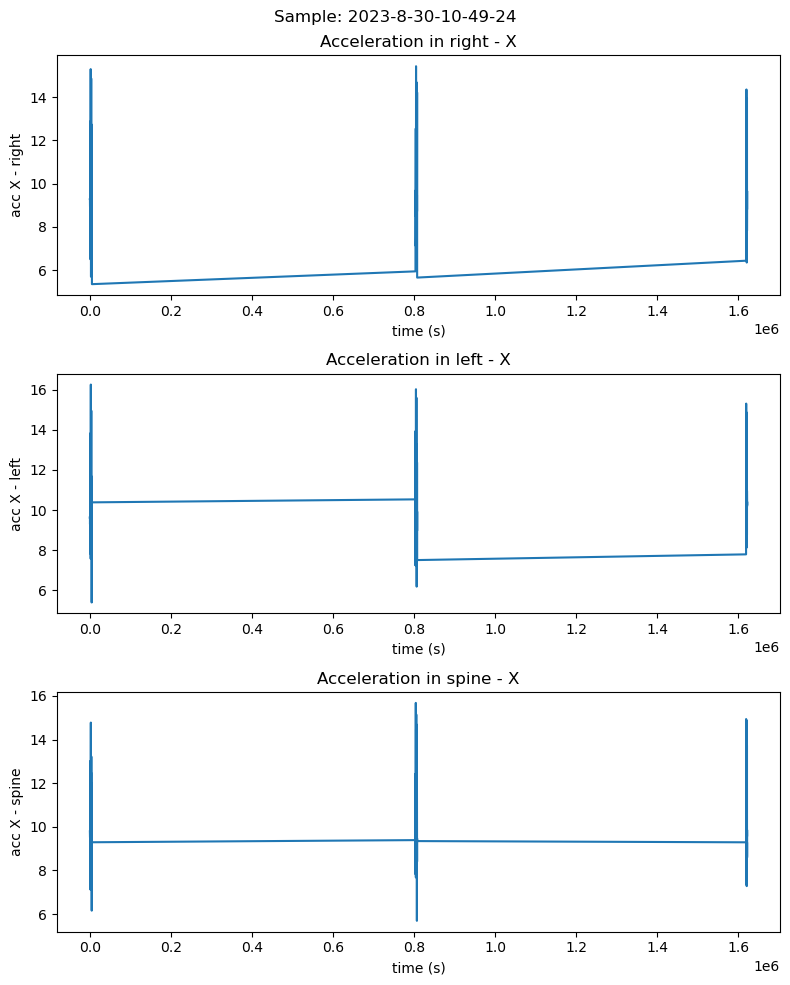

In [63]:
plot_lifts_component_signal(outlier, component, measure)

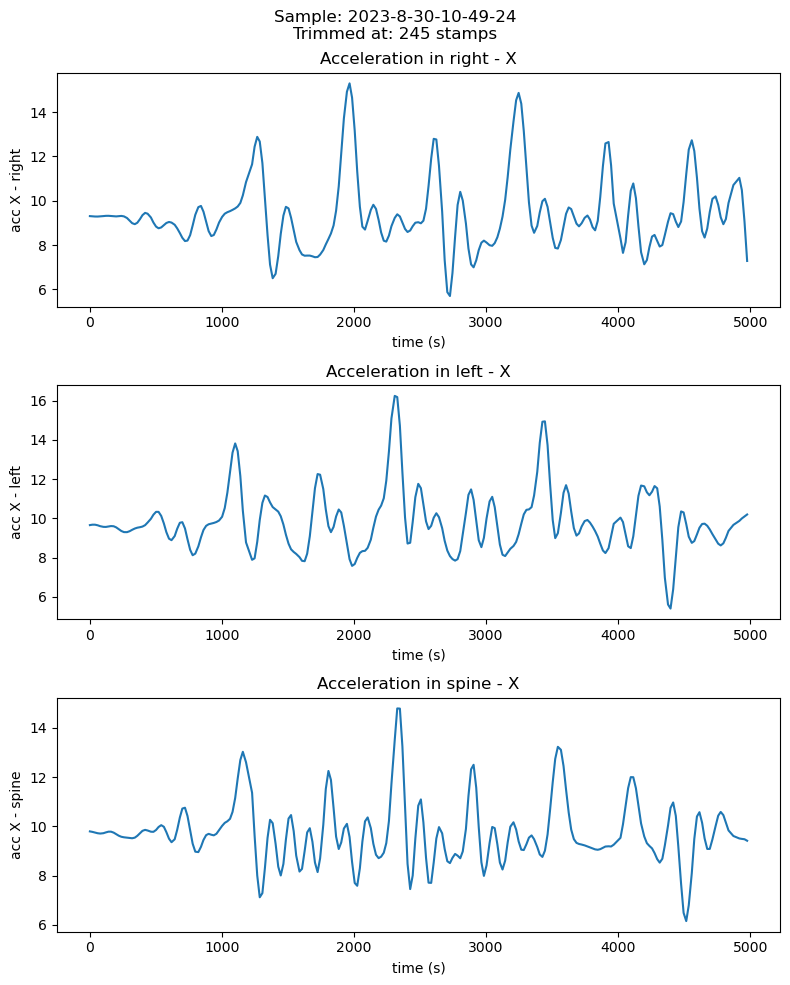

In [64]:
plot_lifts_component_signal(outlier, component, measure, trim_value= 245)

In [65]:
outliers_trim_values[long_records_dates[count]] = 245
count += 1

## Outlier: 609.35 s | 2023-6-17-10-39-17

In [66]:
date = long_records_dates[count]
outlier = imu_data[imu_data['date_measure'] == date]

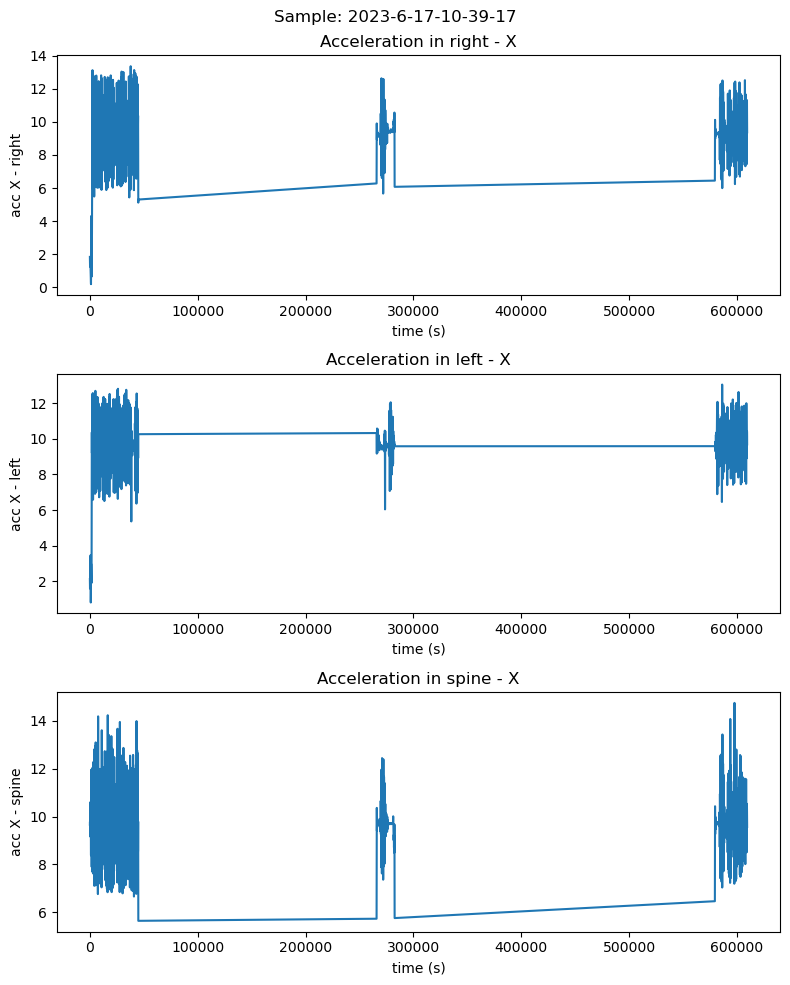

In [67]:
plot_lifts_component_signal(outlier, component, measure)

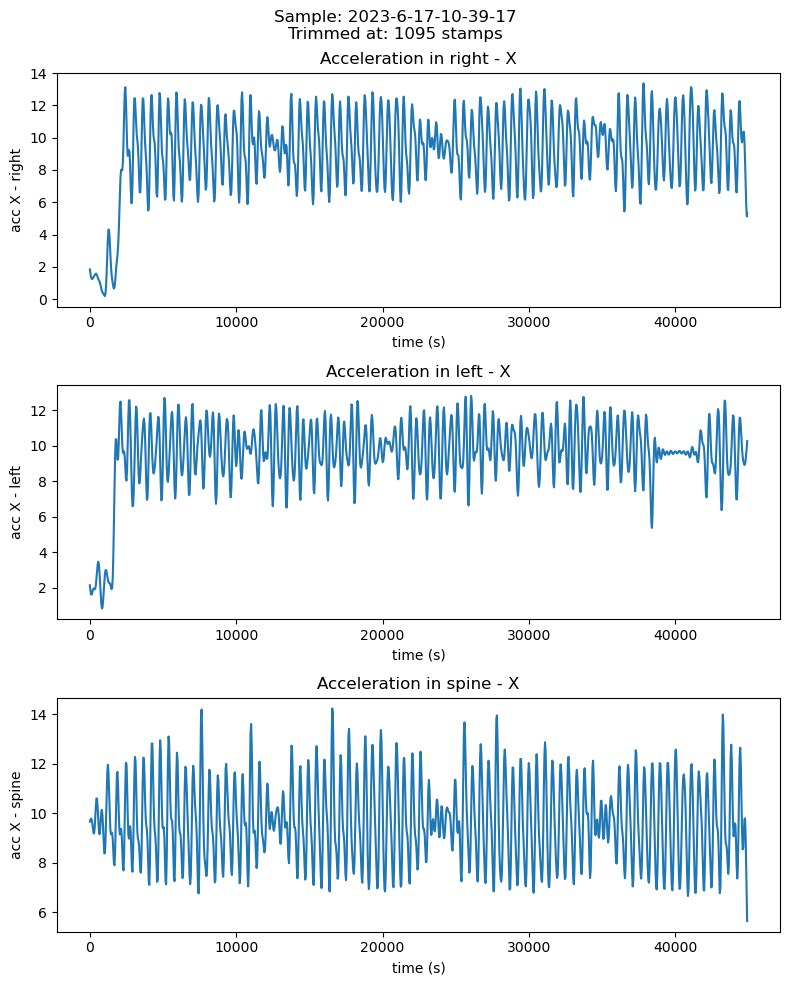

In [68]:
plot_lifts_component_signal(outlier, component, measure, trim_value= 1095)

In [69]:
outliers_trim_values[long_records_dates[count]] = 1095

## Trimming

Now by each outlier we have the max amount of timestamps that could be used for the screening process. The rest of each signal will be deleted

In [70]:
outliers_trim_values

{'2023-7-11-10-15-46': 1965,
 '2023-9-25-8-37-55': 3455,
 '2023-8-31-9-18-42': 312,
 '2023-7-11-8-52-27': 1680,
 '2023-8-30-10-46-18': 377,
 '2023-8-30-10-49-24': 245,
 '2023-6-17-10-39-17': 1095}

In [71]:
trimmed_outliers = pd.DataFrame()
for date in outliers_trim_values:
    temp_trimmed = imu_data[(imu_data['date_measure'] == date)]
    temp_trimmed = temp_trimmed[:outliers_trim_values[date]]
    trimmed_outliers = pd.concat([trimmed_outliers, temp_trimmed])

In [72]:
for date in outliers_trim_values:
    imu_data = imu_data[imu_data['date_measure'] != date]

imu_data = pd.concat([imu_data, trimmed_outliers], ignore_index=True)

In [73]:
len(imu_data['date_measure'].unique())

169

In [74]:
len(imu_data)

494728

# Signal Analysis
One of the last steps of this EDA is the analysis of the components that we have available. To make it
as simple as possible and don't getting too deep into signal processing, we are going to plot all the columns
of the median measure shown before along the time using right arm, X component and the four measured attributes 
(acceleration, gyro, angle of movement, angular speed).

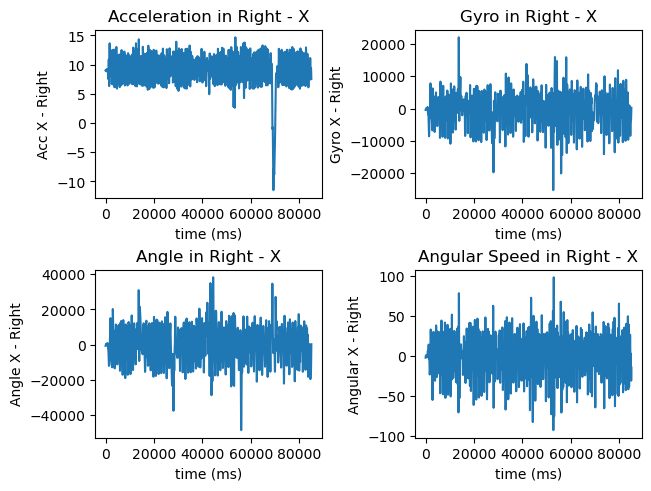

In [75]:
sample = median.copy()
fig, ax = plt.subplots(ncols=2, nrows=2,
                       constrained_layout = True)


ax[0,0].plot(sample['time_stamp'], sample['imu_accX_right'])
ax[0,0].set(xlabel='time (ms)', ylabel='Acc X - Right',
          title='Acceleration in Right - X')


ax[0,1].plot(sample['time_stamp'], sample['imu_gyroX_right'])
ax[0,1].set(xlabel='time (ms)', ylabel='Gyro X - Right',
          title='Gyro in Right - X')


ax[1,0].plot(sample['time_stamp'], sample['imu_angleX_right'])
ax[1,0].set(xlabel='time (ms)', ylabel='Angle X - Right',
            title='Angle in Right - X')


ax[1,1].plot(sample['time_stamp'], sample['imu_angularX_right'])
ax[1,1].set(xlabel='time (ms)', ylabel='Angular X - Right',
            title='Angular Speed in Right - X')


plt.show()

### Delete negative values from accelaration signal
As the previous graph shows, the IMUs measured signal could have atypical data (peaks and off-peaks). Even that we are going to plot 
2 more random samples, that are not part of the long records, to validate if the presence of peaks is common, or if it could be considered as outliers.

In [76]:
import random

random_dates = random.sample(imu_data['date_measure'].tolist(), 2)
for i in range(2):
    while random_dates[i] in long_records_dates:
        random_dates[i] = random.sample(imu_data['date_measure'].tolist(), 1)

print(f'Random samples: {random_dates}')

Random samples: ['2023-10-5-16-23-50', '2023-2-23-14-11-53']


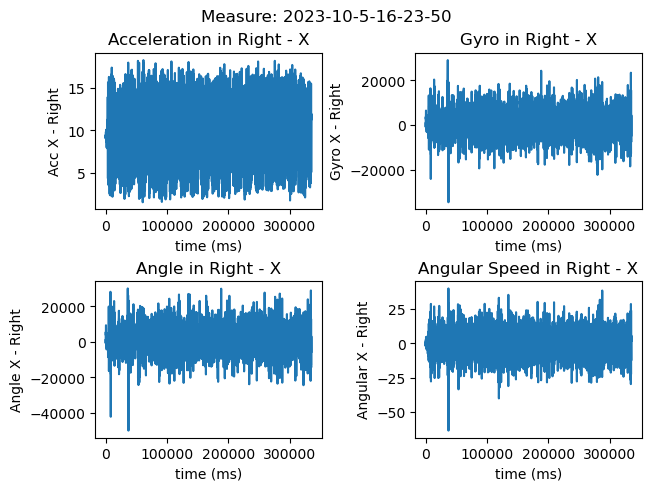

In [77]:
sample1 = imu_data[imu_data['date_measure'] == random_dates[0]]
fig, ax = plt.subplots(ncols=2, nrows=2,
                       constrained_layout = True)


ax[0,0].plot(sample1['time_stamp'], sample1['imu_accX_right'])
ax[0,0].set(xlabel='time (ms)', ylabel='Acc X - Right',
          title='Acceleration in Right - X')


ax[0,1].plot(sample1['time_stamp'], sample1['imu_gyroX_right'])
ax[0,1].set(xlabel='time (ms)', ylabel='Gyro X - Right',
          title='Gyro in Right - X')


ax[1,0].plot(sample1['time_stamp'], sample1['imu_angleX_right'])
ax[1,0].set(xlabel='time (ms)', ylabel='Angle X - Right',
            title='Angle in Right - X')


ax[1,1].plot(sample1['time_stamp'], sample1['imu_angularX_right'])
ax[1,1].set(xlabel='time (ms)', ylabel='Angular X - Right',
            title='Angular Speed in Right - X')

fig.suptitle(f'Measure: {random_dates[0]}')
plt.show()

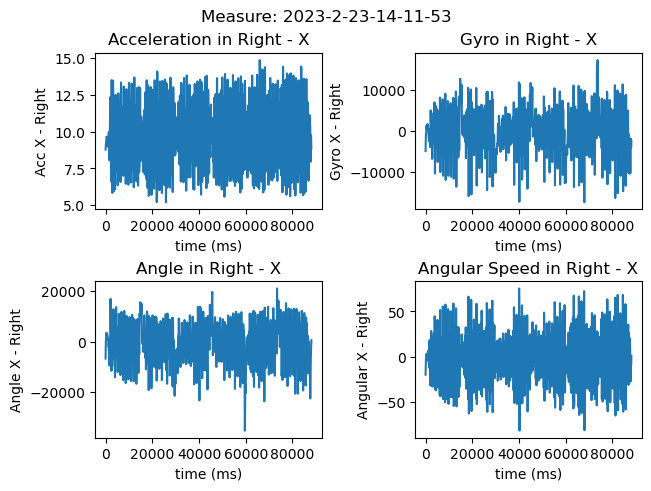

In [78]:
sample2 = imu_data[imu_data['date_measure'] == random_dates[1]]
fig, ax = plt.subplots(ncols=2, nrows=2,
                       constrained_layout = True)


ax[0,0].plot(sample2['time_stamp'], sample2['imu_accX_right'])
ax[0,0].set(xlabel='time (ms)', ylabel='Acc X - Right',
          title='Acceleration in Right - X')


ax[0,1].plot(sample2['time_stamp'], sample2['imu_gyroX_right'])
ax[0,1].set(xlabel='time (ms)', ylabel='Gyro X - Right',
          title='Gyro in Right - X')


ax[1,0].plot(sample2['time_stamp'], sample2['imu_angleX_right'])
ax[1,0].set(xlabel='time (ms)', ylabel='Angle X - Right',
            title='Angle in Right - X')


ax[1,1].plot(sample2['time_stamp'], sample2['imu_angularX_right'])
ax[1,1].set(xlabel='time (ms)', ylabel='Angular X - Right',
            title='Angular Speed in Right - X')

fig.suptitle(f'Measure: {random_dates[1]}')
plt.show()

Currently, we are only going to delete negative values from acceleration (a negative acceleration has no sense in this study) from
all components and limbs.

In [79]:
columns = imu_data.columns.tolist()
acc_pattern = re.compile("imu_acc*")
acc_columns = list(filter(acc_pattern.match, columns))
acc_columns

['imu_accX_right',
 'imu_accY_right',
 'imu_accZ_right',
 'imu_accX_left',
 'imu_accY_left',
 'imu_accZ_left',
 'imu_accX_spine',
 'imu_accY_spine',
 'imu_accZ_spine']

In [257]:
#for column in acc_columns:
    #imu_data = imu_data[imu_data[column] >= 0] 

# Final proportion patients and controls

In [87]:
amount_patients = imu_data.groupby('PD')['anon_id'].nunique()
amount_patients

PD
0    79
1    78
Name: anon_id, dtype: int64

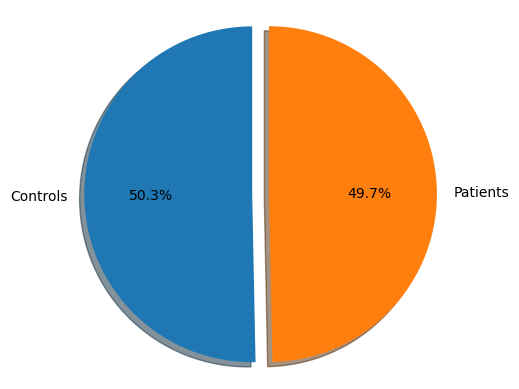

In [88]:
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(amount_patients)))

labels = 'Controls', 'Patients'
sizes = amount_patients
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

In [89]:
num_time_stamps = len(imu_data)
num_measured_persons = len(imu_data['date_measure'].unique())
print(f"""Number of time-stamps: {num_time_stamps}
Number of measured persons: {num_measured_persons}
""")

Number of time-stamps: 493794
Number of measured persons: 166


In [83]:
records = {}
dates = imu_data['date_measure'].unique().tolist()

for date in dates:
    # Always the last value of the list is the greatest timestamp
    records[date]: float = round(imu_data[imu_data['date_measure'] == date]['time_stamp'].tolist()[-1]/1000, 2)

In [94]:
max_duration = max(records.values())
mean_duration = sum(records.values())/len(records)
min_duration = min(records.values())
median_duration = np.median(list(records.values()))
print(f"""Average duration: {mean_duration:} s
Median duration: {median_duration} s 
Min duration: {min_duration} s
Max duration: {max_duration:} s
""")

Average duration: 93.62680722891567 s
Median duration: 80.705 s 
Min duration: 13.87 s
Max duration: 374.63 s


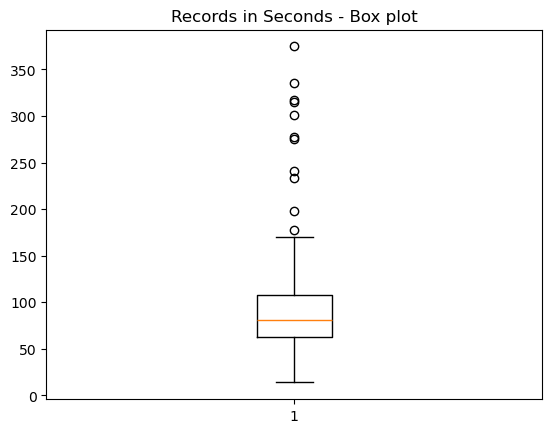

In [95]:
fig2, ax1 = plt.subplots()
plt.boxplot(records.values())
ax1.set_title('Records in Seconds - Box plot')
plt.show()

# Save clean dataset

In [96]:
#Save clean dataset
processed_dir = ROOT_DIR / 'data' / 'processed'
imu_data.to_pickle(processed_dir / 'anon_imu_data_time_series_cleaned.pkl')
imu_data.to_csv(processed_dir / 'anon_imu_data_time_series_cleaned.csv')